=== Model Performance ===
Mean Absolute Error (MAE): 313.77
Mean Squared Error (MSE): 213056.90
Root Mean Squared Error (RMSE): 461.58
R² Score: 0.8798
Adjusted R² Score: 0.8793
Final Accuracy (R² Score): 87.98%


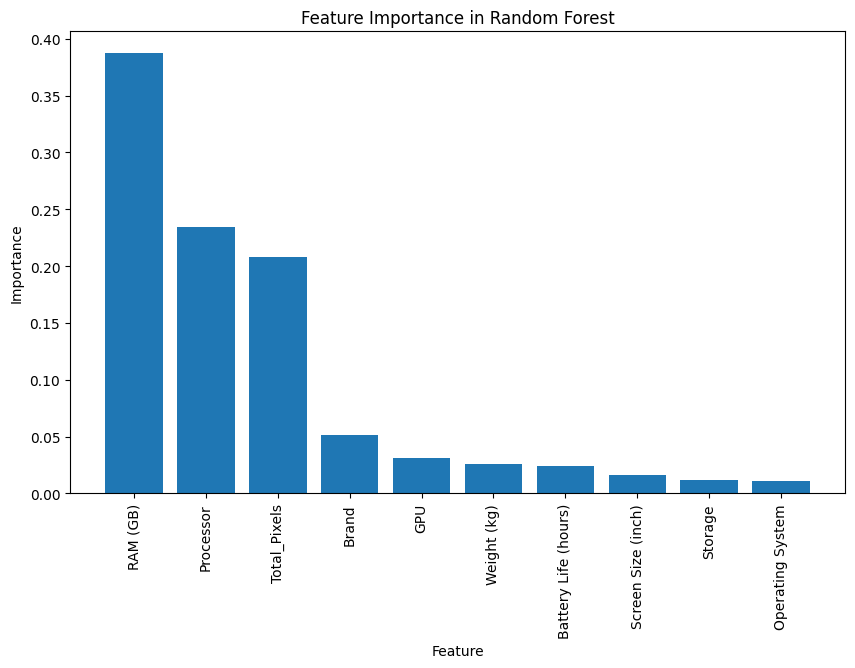

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\Sanjay\Desktop\ML Tutorial\archive\laptop_prices.csv"
df = pd.read_csv(file_path)

# Convert Storage to numerical format (handling missing values)
df['Storage'] = df['Storage'].str.extract(r'(\d+)').dropna().astype(float)

# Convert Resolution to total pixel count
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True).astype(float)
df['Total_Pixels'] = df['Width'] * df['Height']
df.drop(columns=['Resolution', 'Width', 'Height'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Brand', 'Processor', 'GPU', 'Operating System']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=['Price ($)'])
y = df['Price ($)']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R²
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print accuracy metrics
print("=== Model Performance ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Final Accuracy (R² Score): {r2 * 100:.2f}%")

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()
